# Imports

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
%matplotlib inline 
#  !pip3 install mpld3
import mpld3
#pld3.enable_notebook() causes plotting to not work???

from scipy.integrate import odeint
# !pip3 install lmfit
import lmfit
from lmfit.lineshapes import gaussian, lorentzian, exponential

from time import time
import warnings
warnings.filterwarnings('ignore')
# JSM added
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import sys

In [3]:
from Cluster import * 

Getting data:
getting JHU data...
expanding JHU data : to new (daily), 7-day rolling (smoothed), reporting glitch (corrected) and combined
expansion done.
number of countries listed 274
done with JHU data (covid_ts dictionary keys: confirmed, deaths, recovered).  Got  274 countries (countries_jhu).
getting owid data...
expanding OWID data : to new (daily), 7-day rolling (smoothed), reporting glitch (corrected) and combined
done with OWID data (covid_owid_ts dictionary see .keys()) . Got 212 countries (countries_owid)
WHO acute file found dictionary acute_who
ICU file found dictionary icus_2012
---------------------------------
Done with data.
---------------------------------
Constructing common synchronized deaths, case and testing data...
database JHU correct active True
done.
doing piecwise linear fits to testing data ...
done.
making cases with nonlinear testing adjustment...
done.
to change the nonlinear correction function, call make_cases_adj_nonlin(K), K=2 by default
----------

In [4]:
from model_fits import *  # including ModelFit class definition.

loading data.py...
done with data.py.
making the models...
SEI3R
SC3EI3R
SC3UEI3R
done with the models.


In [5]:
# eliminate countries with no population data (needed for normalizing death stats for fits)

#for country in countries:
#    if population_owid[country][0] == 0:
#        print(country)
        
countries = [cc for cc in countries_common if population_owid[cc][-2] > 0]
print(len(countries),'countries with population data')
countries_zp = [cc for cc in countries_common if population_owid[cc][-2] == 0]
print('common countries without population data',countries_zp)
cluster_countries = [c for c in clusdata_all['deaths']]
print(len(cluster_countries),'cluster countries')


186 countries with population data
common countries without population data []
67 cluster countries


In [6]:
[x for x in covid_ts]

['confirmed',
 'deaths',
 'recovered',
 'new_deaths',
 'new_deaths_smoothed',
 'deaths_smoothed',
 'new_deaths_corrected',
 'new_deaths_corrected_smoothed',
 'deaths_corrected_smoothed',
 'new_confirmed',
 'new_confirmed_smoothed',
 'confirmed_smoothed',
 'new_confirmed_corrected',
 'new_confirmed_corrected_smoothed',
 'confirmed_corrected_smoothed',
 'new_recovered',
 'new_recovered_smoothed',
 'recovered_smoothed',
 'new_recovered_corrected',
 'new_recovered_corrected_smoothed',
 'recovered_corrected_smoothed']

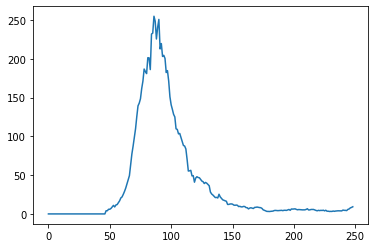

In [12]:
plt.plot(covid_ts['new_deaths_corrected_smoothed'][('Germany','')])

# Use `Modelfit.solvefit()` with `lmfit`

In [39]:
#  for debugging class methods without having to reload all of model_fits.py:
#  file containing only ModelFit class, 
# exec(open('ModelFit_works.py','r').read()) # doesn't work...
exec(open('ModelFit_works.py','r').read())

In [40]:
country = 'Germany'
###############################################
## do the fit
MyModel = ModelFit('SC3EI3R',country=country,new=True,run_id="_testx")

In [41]:

params_init_min_max = {"beta_1": (0.2, 0., 2.),
                   "mu": (.1,0.,.2),
                   "c_0": (0.1, 0., 1.0), 
                   "c_1": (0.07, 0.0, 0.5),
                   "c_2": (1., 0.,20.), 
                    "logI_0": (-6.,-10.,0.0)}

In [42]:
MyModel.params

{'beta_1': 0.4,
 'beta_2': 0.0,
 'beta_3': 0.0,
 'alpha': 0.2,
 'gamma_1': 0.06999999999999999,
 'gamma_2': 0.16666666666666669,
 'gamma_3': 0.1,
 'p_1': 0.030000000000000013,
 'p_2': 0.08333333333333333,
 'mu': 0.1,
 'c_0': 0.1,
 'c_1': 0.016666666666666666,
 'c_2': 10.0,
 'N': 1}

In [43]:
# MyModel.fit(params_init_min_max,diag=False) without fit report
MyModel.fit(params_init_min_max,fit_method='nelder')

elapsed time =  11.511472940444946
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 700
    # data points      = 249
    # variables        = 6
    chi-square         = 7.9533e-11
    reduced chi-square = 3.2729e-13
    Akaike info crit   = -7152.30455
    Bayesian info crit = -7131.19983
##  Warning: uncertainties could not be estimated:
[[Variables]]
    beta_1:  0.42386772 +/-        nan (nan%) (init = 0.2)
    mu:      0.09991010 +/-        nan (nan%) (init = 0.1)
    c_0:     0.24524489 +/-        nan (nan%) (init = 0.1)
    c_1:     0.00460122 +/-        nan (nan%) (init = 0.07)
    c_2:     8.61231162 +/-        nan (nan%) (init = 1)
    logI_0: -7.22819881 +/- 0.00625937 (0.09%) (init = -6)


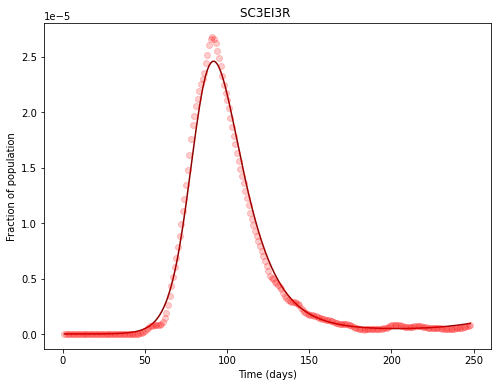

In [44]:
MyModel.solveplot('deaths',datasets=['deaths_corrected_smoothed'])

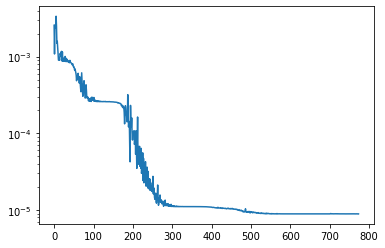

In [45]:
plt.semilogy(MyModel.residall);

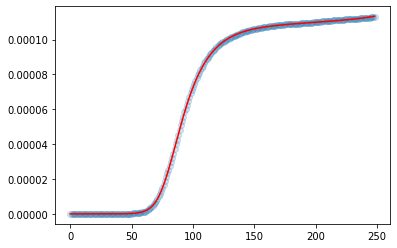

In [43]:
foo = MyModel.solvefit('deaths','deaths_corrected_smoothed')

plt.plot(foo['deaths']['data'],'o',alpha=0.2);
plt.plot(foo['deaths']['soln'],color='red');

In [46]:
pars = [x for x in MyModel.paramall[0]]
pars

['beta_1', 'mu', 'c_0', 'c_1', 'c_2', 'logI_0']

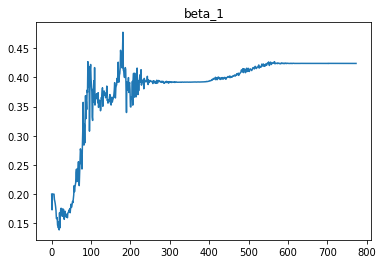

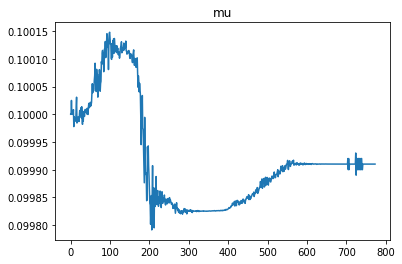

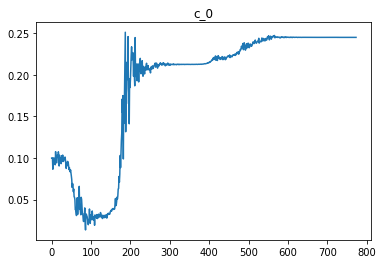

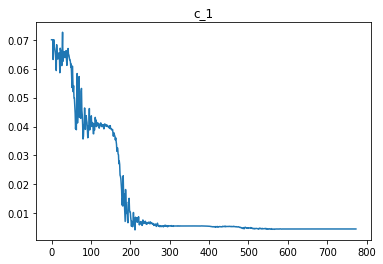

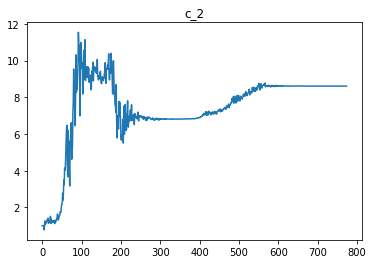

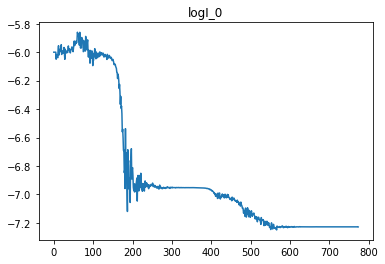

In [47]:
for pp in pars:
    pt = [x[pp].value for x in MyModel.paramall]
    plt.plot(pt)
    plt.title(pp)
    plt.show()

In [39]:
[MyModel.params_lmf[x] for x in MyModel.params_lmf]

[<Parameter 'beta_1', value=0.2, bounds=[0.0:2.0]>,
 <Parameter 'mu', value=0.1, bounds=[0.0:0.2]>,
 <Parameter 'c_0', value=0.1, bounds=[0.0:1.0]>,
 <Parameter 'c_1', value=0.07, bounds=[0.0:0.5]>,
 <Parameter 'c_2', value=5000, bounds=[0.0:20000]>,
 <Parameter 'logI_0', value=-6.0, bounds=[-10.0:0.0]>]

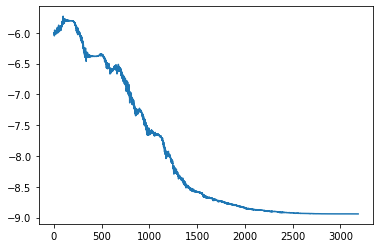

In [43]:
p0 = [x[pars[5]] for x in paramsall]
plt.plot(p0);